### Multi-class Classification

In this notebook we are going to build a deep learning model on **Reuters dataset in Keras**. Reuters datasets comes as package with Keras so we don't have to download it from any website.

**About Dataset**: Data set is set of short newswires and their topics, published by Reuters in 1986. There are 46 different topics and every topics has minimum of 10 examples in the traning set.

Dataset has been splited into traning and test with 8982 and 2246 examples respectively.

**Type of Multi-class classification**: There are two types of Multi-class classification 
1. Single label multi-class classification : Each data point (examples in our case) will classify into only one category.  
2. Multi label multi-class classification  : Each data point will calssify into more than one category. 

In [2]:
#import the libraries 
import numpy as np
import matplotlib.pyplot as plt
import keras 
%matplotlib inline

Using TensorFlow backend.


In [3]:
#Load the data
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=12000)

In [4]:
#Data checking
len(train_data)

8982

In [5]:
len(test_data)

2246

In [5]:
#Let's findout how data train data looks like
train_data[5] #The reuters data short news is a sequence of integer and every integer represents words from dictonery

[1,
 4,
 37,
 38,
 309,
 213,
 349,
 1632,
 48,
 193,
 229,
 463,
 28,
 156,
 635,
 11,
 82,
 14,
 156,
 635,
 11,
 82,
 54,
 139,
 16,
 349,
 105,
 462,
 311,
 28,
 296,
 147,
 11,
 82,
 14,
 296,
 147,
 11,
 54,
 139,
 342,
 48,
 193,
 3234,
 361,
 122,
 23,
 1332,
 28,
 318,
 942,
 11,
 82,
 14,
 318,
 942,
 11,
 82,
 54,
 139,
 122,
 7,
 105,
 462,
 23,
 349,
 28,
 296,
 767,
 11,
 82,
 14,
 296,
 767,
 11,
 54,
 139,
 342,
 229,
 162,
 7,
 48,
 193,
 55,
 408,
 28,
 258,
 557,
 11,
 82,
 14,
 196,
 557,
 11,
 82,
 54,
 139,
 162,
 7,
 105,
 462,
 55,
 349,
 28,
 191,
 968,
 11,
 82,
 14,
 191,
 785,
 11,
 54,
 139,
 17,
 12]

*We can decode the data from integer to words but we are not going to do this here


In [6]:
train_labels[5]

4

In [6]:
#Data Prepration
# Since train data is in form of sequence of words so we need to vectorize it.

def vectorize_sequences(sequences, dimension=12000): #Because we had restricted the number of words 12000
    results = np.zeros((len(sequences), dimension)) #Creating a zero vector of size sequences and dimension
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
# Our Vectorized traning and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
#Vectorizitation of labels
#Keras has inbuild way of converting multi labels into vector form using utiles
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
#Network formation
#We are building three nureal layer network.
#Number of hidden unit in hidden layer is 64 because out layer has 46 units. So if we are are using hidden unit less
#than 46 information dorwpout might occur.
#We have used relu as our activation function for hidden layers and softmax for output layer.
from keras import models
from keras import layers

model = models.Sequential() #We are using sequential model because we are dealing with 2D tensor data
model.add(layers.Dense(64, activation='relu', input_shape=(12000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
#Compiling the model
#We have used rmsprop as optmizier, categorical_crossentropy as loss function because it measures the distance between prediction and ground trouth
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Creating validation data set
x_val = x_train[:1000]
x_train = x_train[1000:]

y_val = train_labels[:1000]
y_train = train_labels[1000:]

In [11]:
#Traning the models in 20 epochs in batchsize 512
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 218us/step - loss: 2.5265 - acc: 0.5005 - val_loss: 1.7178 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 206us/step - loss: 1.4382 - acc: 0.6906 - val_loss: 1.3430 - val_acc: 0.7110
Epoch 3/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.0816 - acc: 0.7676 - val_loss: 1.1664 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 206us/step - loss: 0.8526 - acc: 0.8202 - val_loss: 1.0861 - val_acc: 0.7560
Epoch 5/20
7982/7982 [==============================] - 2s 204us/step - loss: 0.6842 - acc: 0.8527 - val_loss: 0.9834 - val_acc: 0.7790
Epoch 6/20
7982/7982 [==============================] - 2s 204us/step - loss: 0.5482 - acc: 0.8839 - val_loss: 0.9400 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 2s 204us/step - loss: 0.4416 - acc: 0.9074 - val_loss: 0.9142 - val_acc: 0.8060


**We can see after epoch 15 the model is start overfitting. We can visualize through graph** 

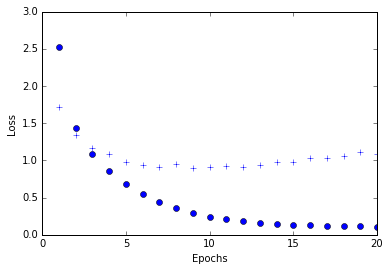

In [13]:
#let's plot the loss and accuracy 
#Plotting loss 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In above graph we can see, initially loss function has been decreasing with each epochs but after epochs 16 it has again started increasing.  

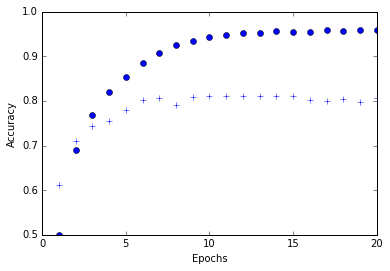

In [16]:
#Let's plot traning and validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

**It seems network start overfitting after epochs 15.** *Which means we can get the maximum validation accuracy for epochs 15.*
We can retrain our model for the getting maximum accuracy. 

In [29]:
# Let's retrain our model for epochs 15
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(12000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#Compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Traning the model
model.fit(x_train, y_train, epochs=14 , batch_size=512, validation_data=(x_val, y_val))

#Results of test data
results = model.evaluate(x_test, test_labels)



Train on 7982 samples, validate on 1000 samples
Epoch 1/14
7982/7982 [==============================] - 2s 207us/step - loss: 2.5265 - acc: 0.5155 - val_loss: 1.6995 - val_acc: 0.6310
Epoch 2/14
7982/7982 [==============================] - 1s 180us/step - loss: 1.4099 - acc: 0.6954 - val_loss: 1.3108 - val_acc: 0.7090
Epoch 3/14
7982/7982 [==============================] - 1s 181us/step - loss: 1.0526 - acc: 0.7747 - val_loss: 1.1442 - val_acc: 0.7590
Epoch 4/14
7982/7982 [==============================] - 1s 181us/step - loss: 0.8343 - acc: 0.8262 - val_loss: 1.0465 - val_acc: 0.7660
Epoch 5/14
7982/7982 [==============================] - 1s 180us/step - loss: 0.6635 - acc: 0.8614 - val_loss: 0.9989 - val_acc: 0.7860
Epoch 6/14
7982/7982 [==============================] - 1s 179us/step - loss: 0.5254 - acc: 0.8899 - val_loss: 0.9531 - val_acc: 0.7970
Epoch 7/14
7982/7982 [==============================] - 1s 179us/step - loss: 0.4225 - acc: 0.9099 - val_loss: 0.9241 - val_acc: 0.8160


Still we can do some further experiement for increasing the accuracy because we are getting maximum accuracy at epochs 8.
**You should try.** 

In [31]:
results

[1.1400843709043806, 0.78584149601941433]

With this approch we are getting accuracy of 78%, which is not bad but accuracy can be increased. 

**Some of the things which I have not mentioned like Why History, activation function etc. You can find about these details in binary calssification.** 